In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#run once per session
!pip install backports.cached-property
!pip install imagecodecs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#input variables
import glob

# enter the path to a tif file or a directory containig tif files (tif files must be uint16 or uint8)
TIFS = glob.glob('/content/drive/MyDrive/Guillaume_Shared/NucID/4X_trainingData/Raul/20220926_STR_A1_1_00d00h00m.tif')
# enter the channel that contains nuclei, if there is only 1 channel enter 1
NucleusChannel = 1

# this is the directory to the weights you want to use. how you enter the path is important here, it must start from the runs file withing yolovy and cant have a forward slash before runs
weights = 'runs/train/fourX320balancedMscale2/weights/best.pt'

# this is what level of confidence you want your model to have a nucleus is a nucleus to count it (ex. .2 means the model thinks there is a 20% chance there is a nucleus). If the models is missing nuclei lower this threshold if it calling
#too many nuclei increse it.
Confidence_thresh = .4

#This is the path to where all the packages are stored such as deeptile and yolov7
PackagePath = '/content/drive/MyDrive/Colab/nucID_pkgs'




### YOU SHOULD NOT NEED TO CHANGE THE PARAMETERS BELOW
# This is the tile size the model takes in. The tile size is ideally the same size of tiles the model was trained on. For the models provided the tile size should stay 640
tileSize=640

#This is how much overlap there are between tiles, this should stay at .1 for most applications
overlap=.1

## DO NOT CHANGE THES LINES OF CODE
#add path to packages
import sys
sys.path.append(PackagePath)
sys.path.append(str(PackagePath + '/yolov7'))

from NucID.Running_functions import LoadModel, LoadTile, RunModel, RunNucID, TestModel, checkNucXY

print(TIFS)

['/content/drive/MyDrive/Guillaume_Shared/NucID/4X_trainingData/Raul/20220926_STR_A1_1_00d00h00m.tif']


In [ ]:
#Run the Model
for tif in TIFS:
  RunNucID(tif,NucleusChannel,weights,PackagePath,Confidence_thresh,tileSize,overlap,upSize=True)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Coordintes of Nuclei can be found here: /content/drive/MyDrive/Guillaume_Shared/NucID/4X_trainingData/Raul/20220926_STR_A1_1_00d00h00m_nuc_xy.csv
148.80371594429016


In [ ]:
#Run this if you want to check how well NucID identified nuclei in the plate

#path of image used to find nuclei
TifPath = '/content/drive/MyDrive/Guillaume_Shared/NucID/4X_trainingData/Raul/20220926_STR_A1_1_00d00h00m.tif'
#csv file containing coordinates of predicted nuclei (output of RunNucID)
coordPath = '/content/drive/MyDrive/Guillaume_Shared/NucID/4X_trainingData/Raul/20220926_STR_A1_1_00d00h00m_nuc_xy.csv'



#run function to check nuclei
checkNucXY(TifPath,coordPath,markerSize=2)

Image with marked nuclei can be found here: /content/drive/MyDrive/Guillaume_Shared/NucID/4X_trainingData/Raul/20220926_STR_A1_1_00d00h00m_nuc_xy_check.jpg


Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
(640, 640)
torch.Size([1, 3, 640, 640])


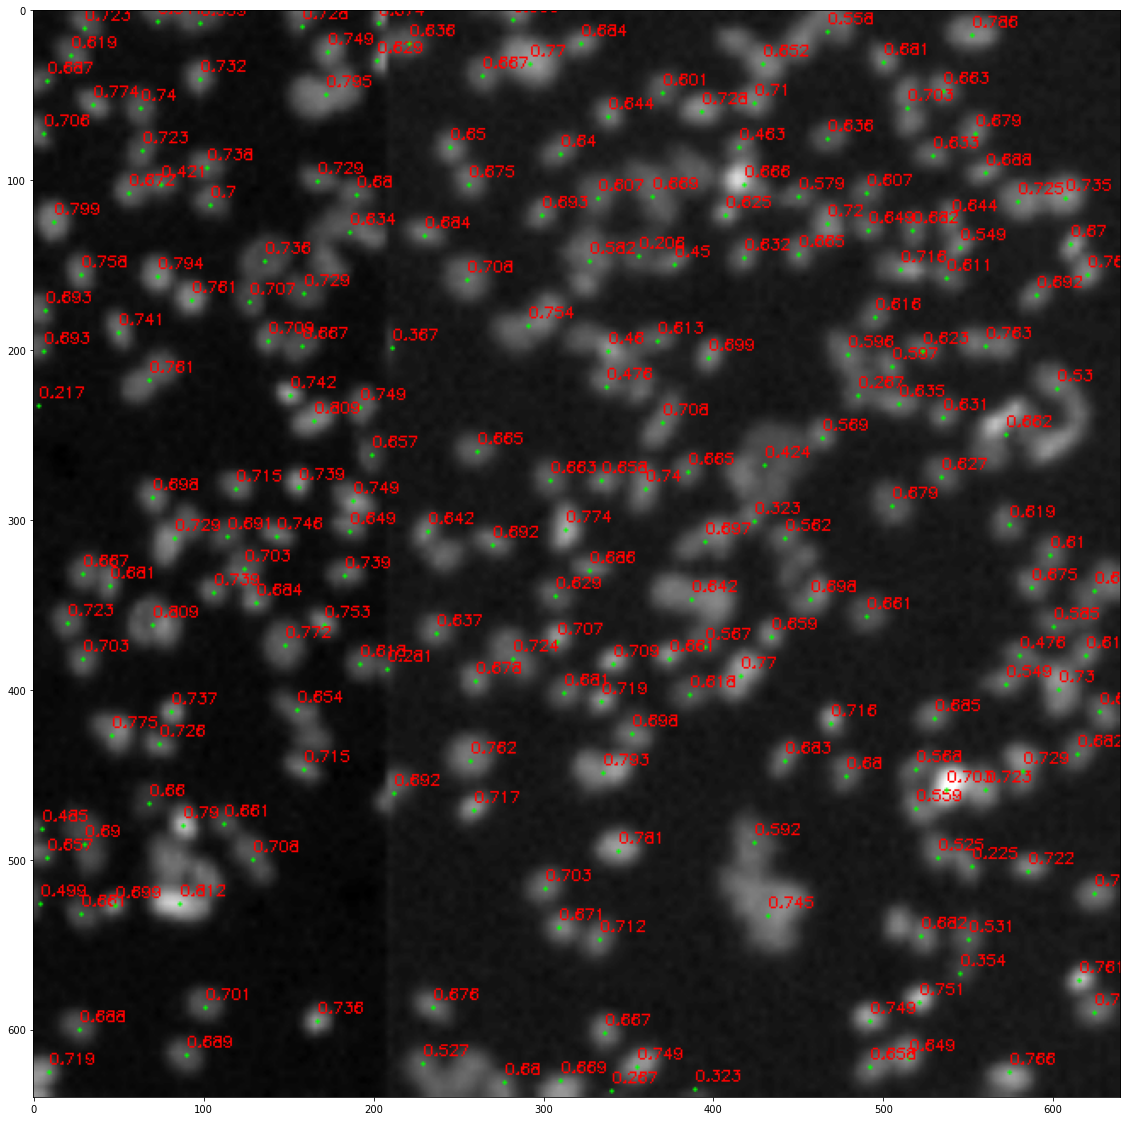

In [ ]:
#Check the Model
%matplotlib inline
# enter the path to a tif file or a directory containig tif files (tif files must be uint16 or uint8)
image = '/content/drive/MyDrive/Guillaume_Shared/NucID/4X_trainingData/Images_masks/20220829_151508_481__Plate000_Well3_ChannelDAPI_Seq0002.tif'

Location = [3100,6900]
# enter the channel that contains nuclei, if there is only 1 channel enter 1
NucleusChannel = 1

# this is the directory to the weights you want to use. how you enter the path is important here, it must start from the runs file withing yolovy and cant have a forward slash before runs
weights ='runs/train/fourXbalanced/weights/last.pt'

# this is what level of confidence you want your model to have a nucleus is a nucleus to count it (ex. .2 means the model thinks there is a 20% chance there is a nucleus). If the models is missing nuclei lower this threshold if it calling
#too many nuclei increse it.
Confidence_thresh = .2

#This is the path to where all the packages are stored such as deeptile and yolov7
PackagePath = '/content/drive/MyDrive/Colab/nucID_pkgs'



TestModel(image,Location,NucleusChannel,weights,PackagePath,conf=Confidence_thresh,tileSize=160, min_brightness=.15,figSize=20,upSize=True)